In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

## data set 

In [2]:
data = pd.read_csv("Breast Cancer Wisconsin (Diagnostic) Data Set.csv")

In [3]:
# Drop ID and unnamed column
data = data.drop(['id', 'Unnamed: 32'], axis=1)

## Choose a Binary Classification Dataset

In [4]:
# Encode target (M = 1, B = 0)
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

## Train/Test Split and Standardize Features|

In [5]:
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Fit a Logistic Regression Model

In [8]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

## Evaluate with Confusion Matrix, Precision, Recall, ROC-AUC

In [9]:
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

In [10]:
# Confusion matrix and report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[70  1]
 [ 2 41]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [11]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
roc_auc

0.99737962659679

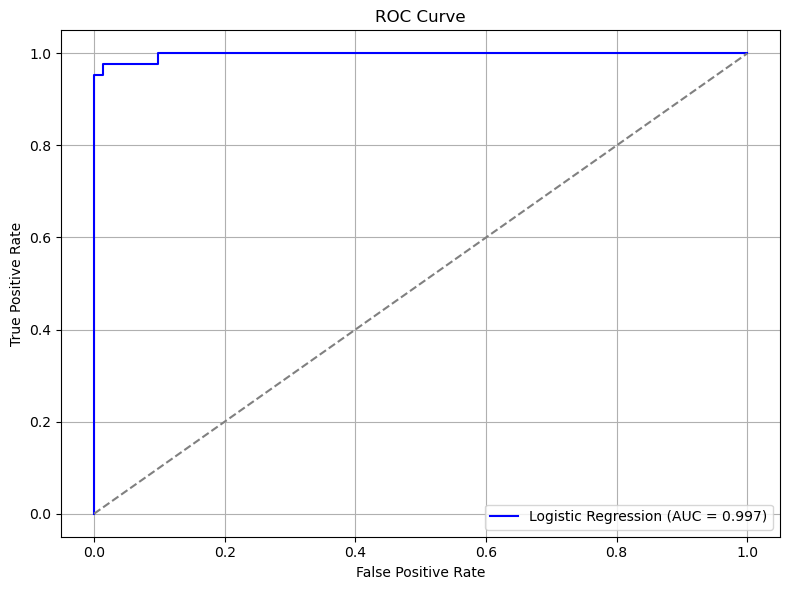

In [12]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc:.3f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Tune Threshold and Explain Sigmoid Function

#### The **sigmoid function** is used to convert the output of the logistic regression model into a probability between 0 and 1:

In [13]:
def evaluate_threshold(thresh):
    y_pred_thresh = (y_proba >= thresh).astype(int)
    print(f"\n--- Threshold: {thresh} ---")
    print(confusion_matrix(y_test, y_pred_thresh))
    print(classification_report(y_test, y_pred_thresh))

evaluate_threshold(0.3)
evaluate_threshold(0.5)
evaluate_threshold(0.6)



--- Threshold: 0.3 ---
[[67  4]
 [ 1 42]]
              precision    recall  f1-score   support

           0       0.99      0.94      0.96        71
           1       0.91      0.98      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114


--- Threshold: 0.5 ---
[[70  1]
 [ 2 41]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


--- Threshold: 0.6 ---
[[71  0]
 [ 2 41]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114

#### Sigmoid function example
#### The **sigmoid function** is used to convert the output of the logistic regression model into a probability between 0 and 1:

In [14]:
import math
def sigmoid(z):
    return 1 / (1 + math.exp(-z))

print("\nSigmoid examples:")
for z in [-2, 0, 2]:
    print(f"sigmoid({z}) = {sigmoid(z):.4f}")



Sigmoid examples:
sigmoid(-2) = 0.1192
sigmoid(0) = 0.5000
sigmoid(2) = 0.8808
